In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Biar angka gak keluar format aneh (misal 1.23e+04), kita set format float biasa
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [4]:
# Load data (default separator adalah koma, jadi gak perlu tulis sep=';')
df = pd.read_csv('../data/insurance.csv')

# Cek 5 baris teratas. Pastikan kolomnya bener: age, sex, bmi, children, smoker, region, charges
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [5]:
print("--- INFO DATA ---")
# Pastikan tidak ada null value dan tipe data benar (float/int/object)
df.info()

print("\n--- STATISTIK ---")
# Cek range nilai. Min age, min bmi, max charges. Masuk akal gak?
df.describe()

--- INFO DATA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

--- STATISTIK ---


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [6]:
# 1. Bikin fungsinya
def bmi_level(bmi):
    if bmi < 25:
        return "Normal"
    elif bmi <= 30:
        return "Overweight"
    else:
        return "Obese"

# 2. Terapkan ke kolom baru
df["BMI_Level"] = df["bmi"].apply(bmi_level)

# 3. Cek hasilnya
print("Hitungan per kategori BMI:")
print(df["BMI_Level"].value_counts())

Hitungan per kategori BMI:
BMI_Level
Obese         705
Overweight    388
Normal        245
Name: count, dtype: int64


In [7]:
# 1. Tentukan batas ambang (Threshold)
# 33% termurah dan 66% termurah
q33 = df["charges"].quantile(0.33)
q66 = df["charges"].quantile(0.66)

print(f"Batas Bawah (Low <): {q33:.2f}")
print(f"Batas Atas (> High): {q66:.2f}")

# 2. Bikin fungsinya
def risk_level(charge):
    if charge <= q33:
        return "Low"
    elif charge <= q66:
        return "Medium"
    else:
        return "High"

# 3. Terapkan
df["Risk_Level"] = df["charges"].apply(risk_level)

# 4. Cek sebaran
print("\nSebaran Risk Level:")
print(df["Risk_Level"].value_counts())

Batas Bawah (Low <): 6196.93
Batas Atas (> High): 12633.38

Sebaran Risk Level:
Risk_Level
High      455
Low       442
Medium    441
Name: count, dtype: int64


In [8]:
# 1. Bikin fungsi interaksi
def risk_profile(row):
    # Akses kolom pakai row['nama_kolom']
    # Prioritas 1: Perokok & Obese (Resiko Super Tinggi)
    if row["smoker"] == "yes" and row["BMI_Level"] == "Obese":
        return "Very High"
    # Prioritas 2: Perokok doang
    elif row["smoker"] == "yes":
        return "High"
    # Prioritas 3: Obese doang
    elif row["BMI_Level"] == "Obese":
        return "Medium"
    # Sisanya: Low
    else:
        return "Low"

# 2. Terapkan (axis=1 WAJIB, karena baca per baris)
df["Risk_Profile"] = df.apply(risk_profile, axis=1)

# 3. Cek hasil
print("Profile Resiko Nasabah:")
print(df["Risk_Profile"].value_counts())

Profile Resiko Nasabah:
Risk_Profile
Medium       561
Low          503
Very High    144
High         130
Name: count, dtype: int64


In [9]:
print("--- CEK 1: Apakah Perokok pasti High Risk? ---")
print(pd.crosstab(df["smoker"], df["Risk_Level"]))

print("\n--- CEK 2: Apakah Obese lari ke Medium/High? ---")
print(pd.crosstab(df["BMI_Level"], df["Risk_Level"]))

# Lihat data final yang udah bersih
df.head()

--- CEK 1: Apakah Perokok pasti High Risk? ---
Risk_Level  High  Low  Medium
smoker                       
no           181  442     441
yes          274    0       0

--- CEK 2: Apakah Obese lari ke Medium/High? ---
Risk_Level  High  Low  Medium
BMI_Level                    
Normal        79   92      74
Obese        256  217     232
Overweight   120  133     135


,age,sex,bmi,children,smoker,region,charges,BMI_Level,Risk_Level,Risk_Profile
0,19,female,27.90,0,yes,southwest,16884.92,Overweight,High,High
1,18,male,33.77,1,no,southeast,1725.55,Obese,Low,Medium
2,28,male,33.00,3,no,southeast,4449.46,Obese,Low,Medium
3,33,male,22.70,0,no,northwest,21984.47,Normal,High,Low
4,32,male,28.88,0,no,northwest,3866.86,Overweight,Low,Low


In [10]:
# Simpan ke folder data sebagai file baru
df.to_csv('../data/insurance_clean.csv', index=False)
print("Data bersih berhasil disimpan ke 'data/insurance_clean.csv'!")

Data bersih berhasil disimpan ke 'data/insurance_clean.csv'!


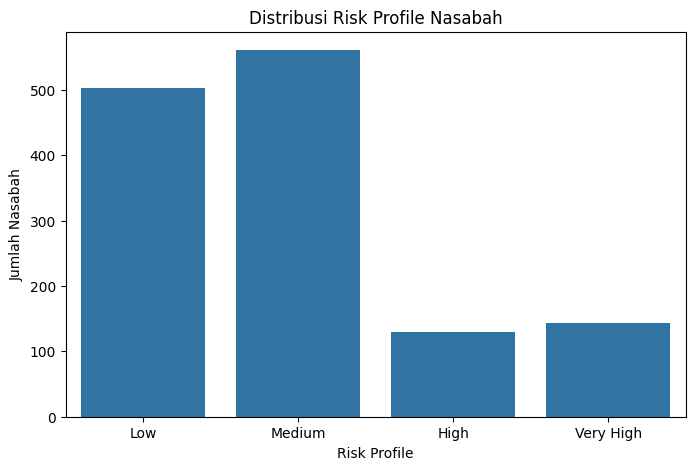

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Risk_Profile",
    order=["Low", "Medium", "High", "Very High"]
)

plt.title("Distribusi Risk Profile Nasabah")
plt.xlabel("Risk Profile")
plt.ylabel("Jumlah Nasabah")
plt.show()


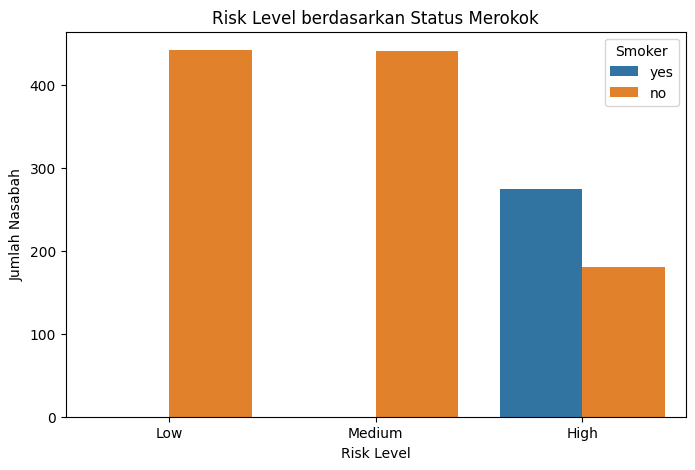

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Risk_Level",
    hue="smoker",
    order=["Low", "Medium", "High"]
)

plt.title("Risk Level berdasarkan Status Merokok")
plt.xlabel("Risk Level")
plt.ylabel("Jumlah Nasabah")
plt.legend(title="Smoker")
plt.show()


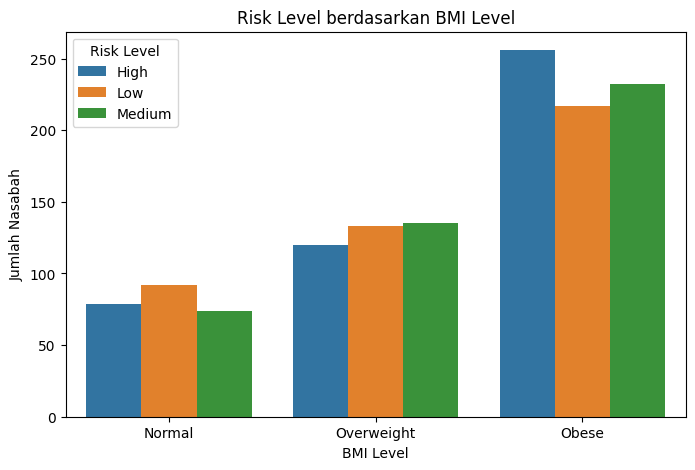

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="BMI_Level",
    hue="Risk_Level",
    order=["Normal", "Overweight", "Obese"]
)

plt.title("Risk Level berdasarkan BMI Level")
plt.xlabel("BMI Level")
plt.ylabel("Jumlah Nasabah")
plt.legend(title="Risk Level")
plt.show()
